# **Linear Regression: Boston House Price Prediction**

Welcome to the Case study on **Linear Regression**. We will use the Boston house price data for the exercise to build a regression model.

--------------

## **Problem Statement**
---------------------------

The problem on hand is to predict the housing prices of a town or a suburb based on the features of the locality provided to us. In the process, we need to identify the most important features in the dataset. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for us. 

----------------------------
## **Data Information**
---------------------------

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below -

Attribute Information (in order):
- **CRIM:**     per capita crime rate by town
- **ZN:**       proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:**    proportion of non-retail business acres per town
- **CHAS:**     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:**      nitric oxides concentration (parts per 10 million)
- **RM:**       average number of rooms per dwelling
- **AGE:**     proportion of owner-occupied units built before 1940
- **DIS:**      weighted distances to five Boston employment centres
- **RAD:**      index of accessibility to radial highways
- **TAX:**      full-value property-tax rate per 10,000 dollars
- **PTRATIO:**  pupil-teacher ratio by town
- **LSTAT:**    %lower status of the population
- **MEDV:**     median value of owner-occupied homes in 1000 dollars.


## **Importing the necessary libraries**

In [131]:
# Import libraries for data manipulation
import pandas as pd
import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot

# Import libraries for building linear regression model using statsmodel
from statsmodels.formula.api import ols
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing Linear Regression from sklearn
from sklearn.linear_model import LinearRegression

# Import library for preparing data
from sklearn.model_selection import train_test_split

# Import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

# Importing random forest regressor usinf sklearn
from sklearn.ensemble import RandomForestRegressor

# Import the required function
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree

import warnings
warnings.filterwarnings("ignore")

### **Read the dataset**

In [132]:
df = pd.read_csv("Boston.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


**Observations:**
* The price of the house indicated by the variable MEDV is the target variable and the rest are the independent variables based on which we will predict house price.

#### **Get information about the dataset using the info() method**

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


**Observations:**
* There are a total of 506 non-null observations in each of the columns. This indicates that there are no missing values in the data.

* Every column in this dataset is numeric in nature.

## **Exploratory Data Analysis**

#### **Let's now check the summary statistics of this dataset**

In [134]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


**Observations:**
* The **50th percentile of ZN** (proportion of residential land zoned for lots over 25,000 sq.ft.) **is 0**. This indicates that at least half the residential plots are under 25,000 sq. ft in area.

* The **75th percentile of CHAS** (Charles River dummy variable) **is 0**. It indicates that the vast majority of these houses are away from the Charles River.

* The **mean house price** is approx. **USD 22,500**, whereas **the median of the house prices** is approx. **USD 21,200**. This indicates that the price distribution is only slightly skewed towards the right side.



Before performing the modeling, it is important to check the univariate distribution of the variables.

## **Univariate Analysis**

### **Check the distribution of the variables**

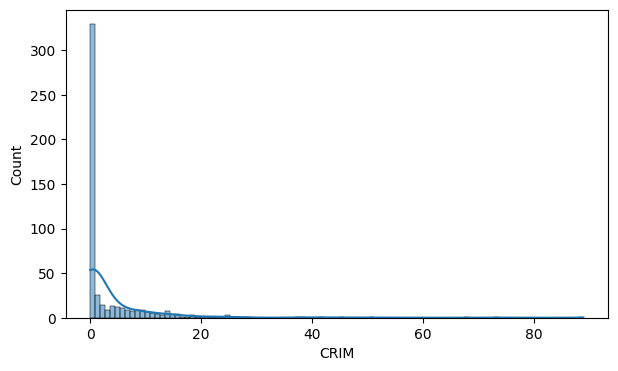

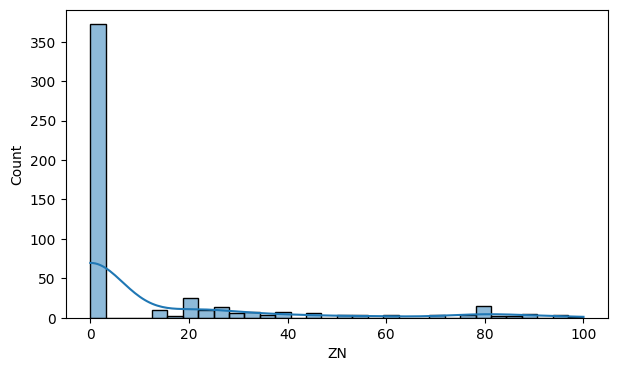

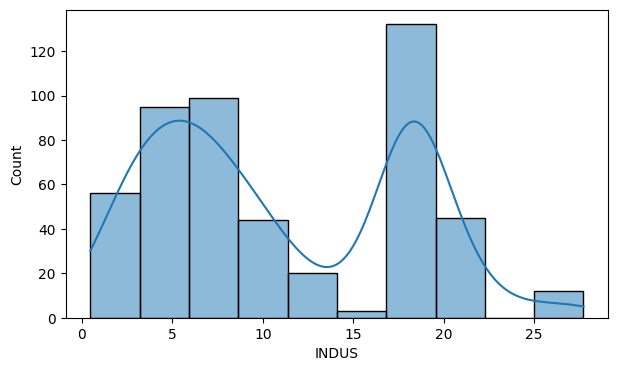

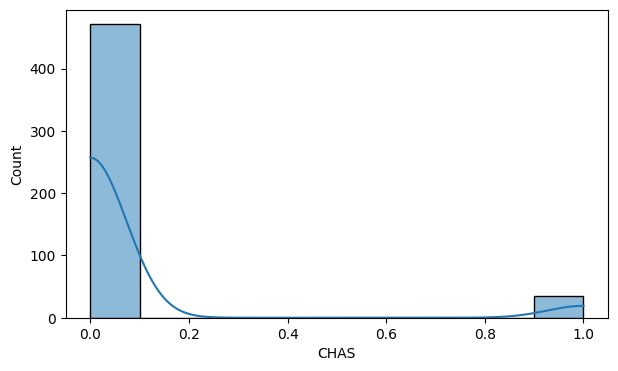

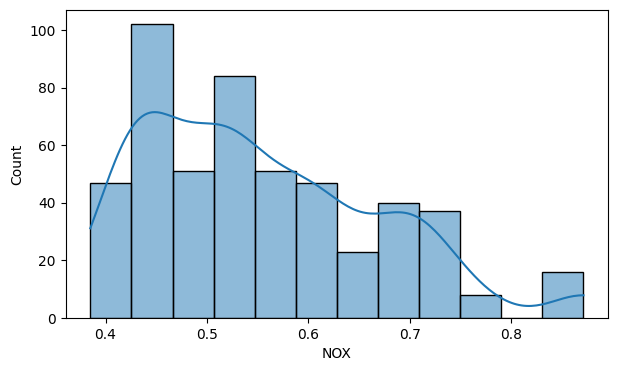

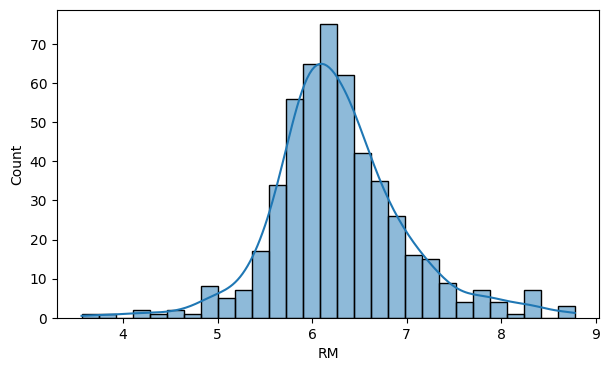

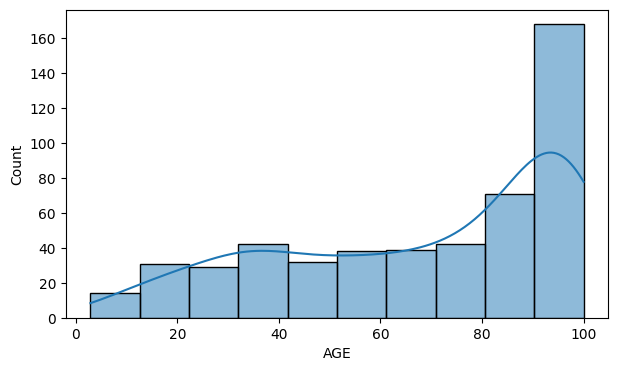

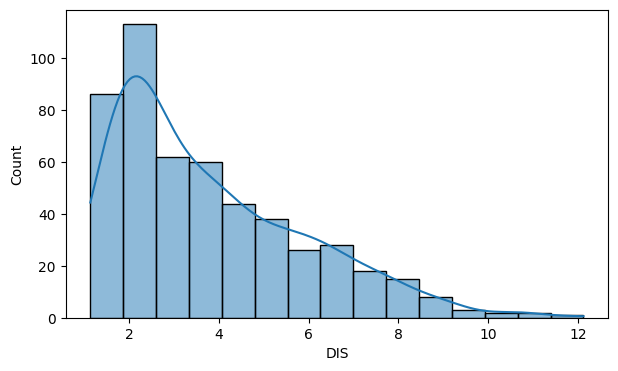

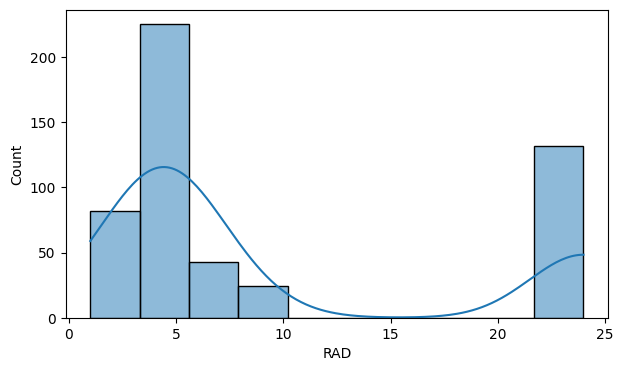

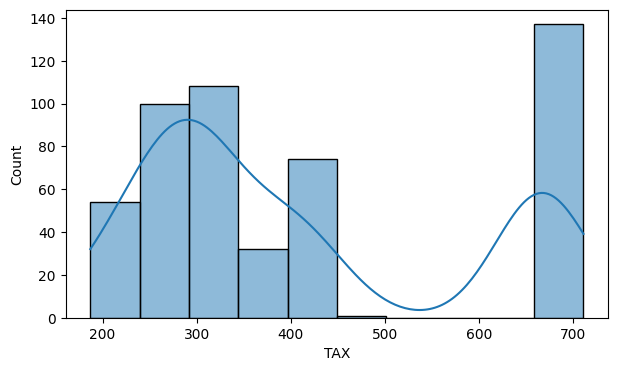

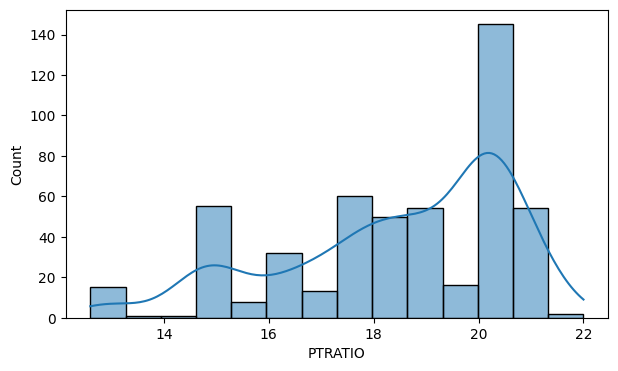

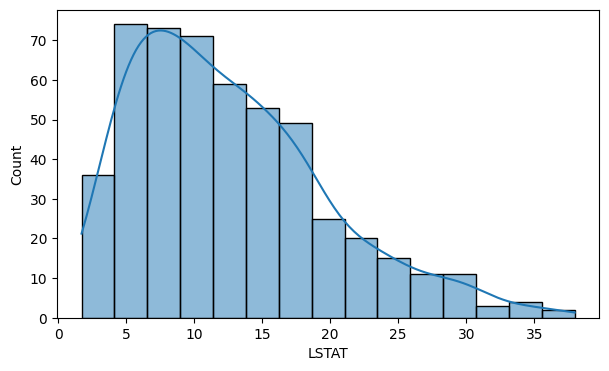

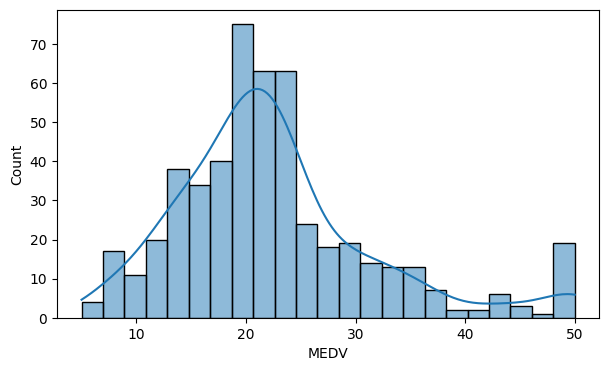

In [135]:
# let's plot all the columns to look at their distributions
for i in df.columns:
    plt.figure(figsize = (7, 4))
    sns.histplot(data = df, x = i, kde = True)
    plt.show()

**Observations:**

* **The variables CRIM and ZN are positively skewed.** This suggests that most of the areas have lower crime rates and most residential plots are under the area of 25,000 sq. ft.
* **The variable CHAS, with only 2 possible values 0 and 1, follows a binomial distribution**, and the majority of the houses are away from the Charles river (CHAS = 0).
* The distribution of the variable AGE suggests that many of the owner-occupied houses were built before 1940. 
* **The variable DIS** (average distances to five Boston employment centers) **has a nearly exponential distribution**, which indicates that most of the houses are closer to these employment centers.
* **The variables TAX and RAD have a bimodal distribution**, indicating that the tax rate is possibly higher for some properties which have a high index of accessibility to radial highways.  
* The dependent variable MEDV seems to be slightly right-skewed.

As the dependent variable is sightly skewed, we will apply a **log transformation on the 'MEDV' column** and check the distribution of the transformed column.

In [136]:
df['MEDV_log'] = np.log(df['MEDV'])

<AxesSubplot: xlabel='MEDV_log', ylabel='Count'>

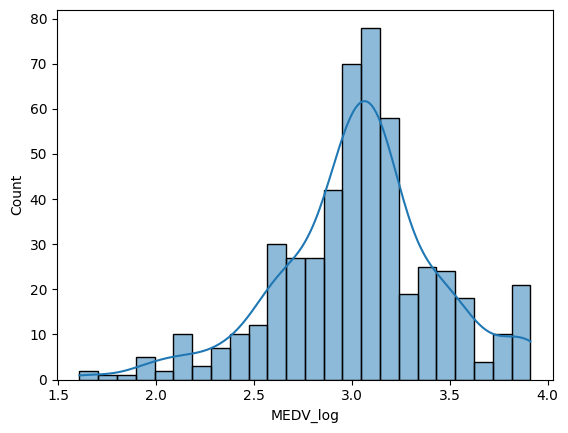

In [137]:
sns.histplot(data = df, x = 'MEDV_log', kde = True)

**Observation:**

- The log-transformed variable (**MEDV_log**) appears to have an **approx. normal distribution and with less skew**, and hence we can proceed.

Before creating the linear regression model, it is important to check the bivariate relationship between the variables. Let's check the same using the heatmap and scatterplot.

## **Bivariate Analysis**

### **Let's check the correlation using the heatmap**

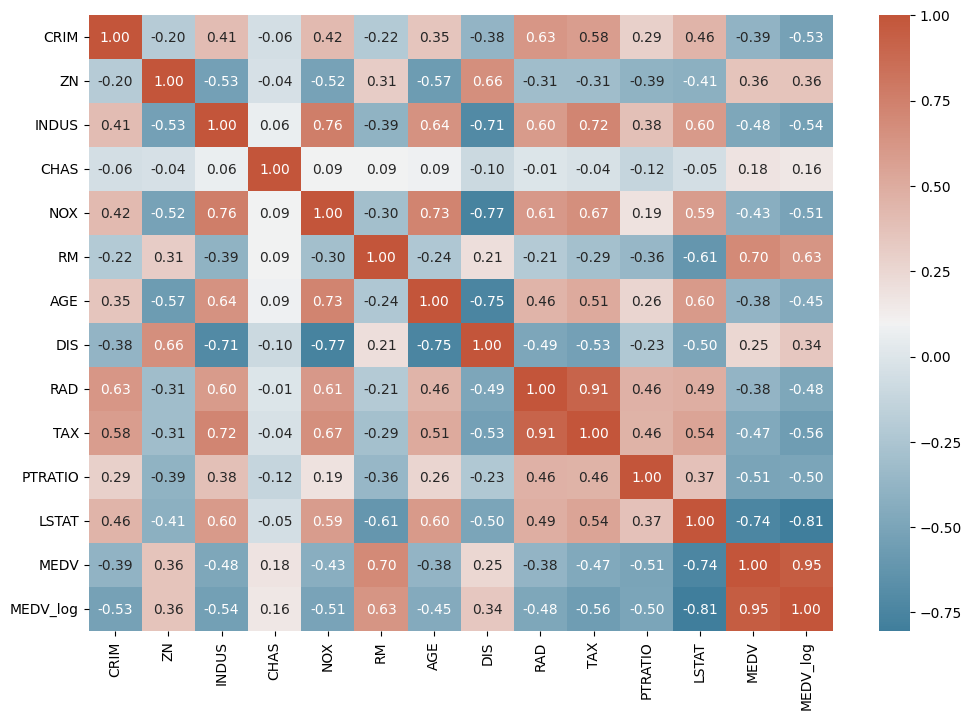

In [138]:
plt.figure(figsize = (12, 8))
cmap = sns.diverging_palette(230, 20, as_cmap = True)
sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = cmap )
plt.show()

**Observations:**

* **Significant correlations** are present between **NOX and INDUS** (0.76) - because areas with a higher proportion of non-retail industries are likely to contribute to Nitric Oxide air pollution.
* The variable **DIS has a strong negative correlation with INDUS (-0.71), NOX (-0.77), and AGE (-0.75)**, which are all significantly positively correlated with each other as well. An explanation for this could be that areas closer to the center of the Boston city/metropolitan area, contain the oldest buildings and factories of importance, and their distance from the five employment centers in the heart of the city is also consequently small.
* Features **RAD and TAX are very strongly correlated (0.91)**.
* **INDUS and TAX** are also significantly correlated (0.72).
* **RM shows a significant positive correlation with MEDV**, likely since the higher the number of rooms per dwelling the more expensive the house is, while **LSTAT shows a strong negative linear relationship with MEDV**, showing the likelihood of houses in areas with a higher percentage of the lower-status population (poor education, laborers and unskilled employment) to be less expensive.


## **Model Building - Approach**

1. Data preparation
2. Partition the data into train and test set
3. Build model on the train data
4. Cross-validating the model
5. Test the data on test set

### **Split the dataset**
Let's split the data into the dependent and independent variables and further split it into train and test set in a ratio of 70:30 for train and test set.

In [139]:
# Separate the dependent and indepedent variable
Y = df['MEDV_log']
X = df.drop(columns = {'MEDV', 'MEDV_log'})

# Add the intercept term
X = sm.add_constant(X)

X

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,1.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,1.0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,1.0,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,1.0,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
4,1.0,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67
502,1.0,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08
503,1.0,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64
504,1.0,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48


In [140]:
# Splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30 , random_state = 1)

Next, we will check the **multicollinearity** in the train dataset.

### **Check for Multicollinearity**

* **Multicollinearity** occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable.

* There are different ways of detecting (or testing) multi-collinearity, one such way is the Variation Inflation Factor.

* **Variance Inflation factor**:  Variance inflation factors measures the  inflation in the variances of the regression parameter estimates due to collinearity that exists among the predictors. It is a measure of how much  the variance of the estimated regression coefficient βk is "inflated" by the  existence of correlation among the predictor variables in the model. 

* General Rule of thumb: If VIF is 1 then there is no correlation between the kth predictor and the remaining predictor variables, and  hence the variance of β̂k is not inflated at all. Whereas if **VIF exceeds 5 or is close to exceeding 5, we say there is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity.**

In [141]:
# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train))

    feature         VIF
0     const  535.372593
1      CRIM    1.924114
2        ZN    2.743574
3     INDUS    3.999538
4      CHAS    1.076564
5       NOX    4.396157
6        RM    1.860950
7       AGE    3.150170
8       DIS    4.355469
9       RAD    8.345247
10      TAX   10.191941
11  PTRATIO    1.943409
12    LSTAT    2.861881


* There are two variables with a high VIF - RAD and TAX. Let's remove TAX as it has the highest VIF values and check the multicollinearity again.

#### **Dropping the column 'TAX' from the training data and checking if multicollinearity is removed**

In [142]:
# Create the model after dropping TAX
X_train = X_train.drop(columns = 'TAX')

# Check for VIF
print(checking_vif(X_train))

    feature         VIF
0     const  532.025529
1      CRIM    1.923159
2        ZN    2.483399
3     INDUS    3.270983
4      CHAS    1.050708
5       NOX    4.361847
6        RM    1.857918
7       AGE    3.149005
8       DIS    4.333734
9       RAD    2.942862
10  PTRATIO    1.909750
11    LSTAT    2.860251


Now, we will create **the linear regression model** as the VIF is less than 5 for all the independent variables, and we can assume that multicollinearity has been removed between the variables.

### **Creating linear regression model using statsmodels OLS**

In [143]:
# Create the model
model1 = sm.OLS(y_train, X_train).fit()

# Get the model summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_log   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     103.3
Date:                Sun, 30 Oct 2022   Prob (F-statistic):          1.40e-101
Time:                        22:31:10   Log-Likelihood:                 76.596
No. Observations:                 354   AIC:                            -129.2
Df Residuals:                     342   BIC:                            -82.76
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6324      0.243     19.057      0.000       4.154       5.111
CRIM          -0.0128      0.002     -7.445      0.000      -0.016      -0.009
ZN             0.0010      0.001      1.425      0.155      -0.000       0.002
INDUS         -0.0004      0.003     -0.148      0.883      -0.006       0.005
CHAS           0.1196      0.039      3.082      0.002       0.043       0.196
NOX           -1.0598      0.187     -5.675      0.000      -1.427      -0.692
RM             0.0532      0.021      2.560      0.011       0.012       0.094
AGE            0.0003      0.001      0.461      0.645      -0.001       0.002
DIS           -0.0503      0.010     -4.894      0.000      -0.071      -0.030
RAD            0.0076      0.002      3.699      0.000       0.004       0.012
PTRATIO       -0.0452      0.007     -6.659      0.000      -0.059      -0.032
LSTAT         -0.0298      0.002    -12.134      0.000      -0.035      -0.025
==============================================================================
Omnibus:                       30.699   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.718
Skew:                           0.372   Prob(JB):                     6.62e-19
Kurtosis:                       5.263   Cond. No.                     2.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- We can see that the `R-squared` for the model is `0.76`. 
- Not all the variables are statistically significant to predict the outcome variable. To check which are statistically significant or have predictive power to predict the target variable, we need to check the `p-value` against all the independent variables.

**Interpreting the Regression Results:**

1. **Adjusted. R-squared**: It reflects the fit of the model.
    - R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - In our case, the value for Adj. R-squared is **0.76**

2. **coeff**: It represents the change in the output Y due to a change of one unit in the variable (everything else held constant).
3. **std err**: It reflects the level of accuracy of the coefficients.
    - The lower it is, the more accurate the coefficients are.
4. **P >|t|**: It is p-value.
   
   * Pr(>|t|): For each independent feature there is a null hypothesis and an  alternate hypothesis 

    Ho: Independent feature is not significant 
   
    Ha: Independent feature is significant 
    
   * A p-value of less than 0.05 is considered to be statistically significant.

   
5. **Confidence Interval**: It represents the range in which our coefficients are likely to fall (with a likelihood of 95%).



* Both the **R-squared and Adjusted R-squared of the model are around 76%**. This is a clear indication that we have been able to create a good model that can explain variance in the house prices for up to 76%.

* We can examine the significance of the regression model, and try dropping insignificant variables.

#### **Dropping the insignificant variables from the above model and creating the regression model again.**

### **Examining the significance of the model**

It is not enough to fit a multiple regression model to the data, it is necessary to check whether all the regression coefficients are significant or not. The significance here means whether the population regression parameters are significantly different from zero. 

From the above, it may be noted that the regression coefficients corresponding to ZN, AGE, and INDUS are not statistically significant at level α = 0.05. In other words, the regression coefficients corresponding to these three are not significantly different from 0 in the population. Hence, we will eliminate the three features and create a new model.

In [144]:
# Create the model after dropping TAX
Y = df['MEDV_log']
X = df.drop(columns = {'MEDV', 'MEDV_log', 'TAX', 'ZN', 'AGE', 'INDUS'})
X = sm.add_constant(X)

# Splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30 , random_state = 1)

# Create the model
model2 = sm.OLS(y_train, X_train).fit()

# Get the model summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_log   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     142.1
Date:                Sun, 30 Oct 2022   Prob (F-statistic):          2.61e-104
Time:                        22:31:10   Log-Likelihood:                 75.486
No. Observations:                 354   AIC:                            -133.0
Df Residuals:                     345   BIC:                            -98.15
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6494      0.242     19.242      0.000       4.174       5.125
CRIM          -0.0125      0.002     -7.349      0.000      -0.016      -0.009
CHAS           0.1198      0.039      3.093      0.002       0.044       0.196
NOX           -1.0562      0.168     -6.296      0.000      -1.386      -0.726
RM             0.0589      0.020      2.928      0.004       0.019       0.098
DIS           -0.0441      0.008     -5.561      0.000      -0.060      -0.028
RAD            0.0078      0.002      3.890      0.000       0.004       0.012
PTRATIO       -0.0485      0.006     -7.832      0.000      -0.061      -0.036
LSTAT         -0.0293      0.002    -12.949      0.000      -0.034      -0.025
==============================================================================
Omnibus:                       32.514   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.354
Skew:                           0.408   Prob(JB):                     1.07e-19
Kurtosis:                       5.293   Cond. No.                         690.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observations:**
* We can see that the **R-squared value has decreased by 0.002** since we have removed variables from the model, whereas the **adjusted R-squared value has increased by 0.001** since we removed statistically insignificant variables only.

Now, we will check the linear regression assumptions.

#### **Checking the performance of the model on the train and test data set**

In [145]:
# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test, y_train, y_test):

    # Insample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test),
                ],
            }
        )
    )


# Checking model performance
model_pref(model2, X_train, X_test, y_train, y_test)  

    Data      RMSE       MAE      MAPE
0  Train  0.195504  0.143686  4.981813
1   Test  0.198045  0.151284  5.257965


**Observations:**

* RMSE, MAE, and MAPE of train and test data are not very different, indicating that the **model is not overfitting and has generalized well.**

#### **Applying the cross validation technique to improve the model and evaluating it using different evaluation metrics.**

In [146]:
# Build the regression model using Sklearn Linear regression
linearregression = LinearRegression()                                    

cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv = 10) # cv = 10 represents data is divided into 10 folds.
cv_Score12 = cross_val_score(linearregression, X_train, y_train, cv = 10, 
                             scoring = 'neg_mean_squared_error')                                  


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.729 (+/- 0.232)
Mean Squared Error: 0.041 (+/- 0.023)


**Observations:**
- The R-squared on the cross-validation is 0.729, whereas on the training dataset it was 0.769
- And the MSE on cross-validation is 0.041, whereas on the training dataset it was 0.038

We may want to reiterate the model building process again with new features or better feature engineering to increase the R-squared and decrease the MSE on cross validation.

**Get model Coefficients in a pandas dataframe with column 'Feature' having all the features and column 'Coefs' with all the corresponding Coefs. Write the regression equation.**

In [147]:
coef = model2.params
coef

const      4.649386
CRIM      -0.012500
CHAS       0.119773
NOX       -1.056225
RM         0.058907
DIS       -0.044069
RAD        0.007848
PTRATIO   -0.048504
LSTAT     -0.029277
dtype: float64

In [148]:
linearregression.fit(X_train, y_train).coef_

array([ 0.        , -0.01250046,  0.11977319, -1.05622535,  0.05890658,
       -0.04406889,  0.00784847, -0.04850362, -0.02927704])

In [149]:
# Let us write the equation of the fit
Equation = "log (Price) ="
print(Equation, end = '\t')
for i in range(len(coef)):
    print('(', coef[i], ') * ', coef.index[i], '+', end = ' ')

log (Price) =	( 4.649385823266634 ) *  const + ( -0.012500455079103785 ) *  CRIM + ( 0.11977319077019677 ) *  CHAS + ( -1.056225351668325 ) *  NOX + ( 0.05890657510928028 ) *  RM + ( -0.04406889079940611 ) *  DIS + ( 0.007848474606243312 ) *  RAD + ( -0.048503620794998564 ) *  PTRATIO + ( -0.029277040479796717 ) *  LSTAT + 

### **Interpreting Regression Coefficients**

With our linear regression model's adjusted R-squared value of around 0.76, we can capture **76% of the variation** in our data.


The model indicates that the most significant predictors of the logarithm of house prices are:


**NOX:**      -1.056225

**CHAS:**      0.119773

**RM:**         0.058907

**CRIM:**      -0.012500

**PTRATIO:**   -0.048504

**DIS:**       -0.044069
    
**LSTAT:**     -0.029277

**RAD:**        0.007848


The p-values for these variables are < 0.05 in our final model, meaning they are statistically significant toward house price prediction.

**It is important to note here that the predicted values are log (MEDV) and therefore coefficients have to be converted accordingly by taking their exponent to understand their influence on price.**


* The house price decreases with an increase in NOX (nitric oxide concentration). **1 unit increase in the NOX leads to a decrease of** exp(1.056225) ~ **2.88 times the price** of the house when everything else is constant. This is fairly easy to understand as more polluted areas are not desirable to live in and hence cost less.

* The house price increases with an increase in CHAS (Charles River variable). **1 unit increase in CHAS leads to an increase of** exp(0.119773) ~ **1.12 times the price** of the house. This is understandable, as houses by the river would be more desirable due to their scenic view, and hence more expensive.

* The house price increases with an increase in RM (average number of rooms per dwelling). **1 unit increase in RM leads to** exp(0.058907) ~ 1.06 times, or a **6% increase in the price of the house** when everything else is constant. Clearly, the higher the average number of rooms per dwelling, the more expensive the house.

* Other variables such as CRIM (per capita crime rate by town), PTRATIO (pupil-teacher ratio by town), DIS (weighted distances to 5 Boston employment centers) and LSTAT (% Lower Status of the population) are all negatively correlated with house price, for differing reasons.

* The RAD variable (index of accessibility to radial highways), with a small coefficient of 0.008, while being statistically significant, does not appear to have much of an effect on the price of the house.

## **Additional Content (Optional)**

#### **Let's now build  Non- Linear models like Decision tree and Random forest and check their performance**

### **Building Decision Tree**

In [150]:
# Importing Decision tree regressor using sklearn
from sklearn.tree import DecisionTreeRegressor

In [151]:
# Splitting the data in 70:30 ratio of train to test data
# Separate the dependent and indepedent variable
Y1 = df['MEDV_log']
X1 = df.drop(columns = {'MEDV', 'MEDV_log'})
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size = 0.30 , random_state = 1)

In [152]:
# Defining the Descision tree regressor
dt = DecisionTreeRegressor(min_samples_split = 2)

# Fitting Descision Tree regressor to train dataset
dt.fit(X_train1,y_train1)

DecisionTreeRegressor()

**Checking model perform on the train and test dataset**

In [153]:
model_pref(dt, X_train1, X_test1, y_train1, y_test1)  

    Data          RMSE           MAE          MAPE
0  Train  5.277808e-17  6.272446e-18  1.603377e-16
1   Test  2.420733e-01  1.546446e-01  5.393458e+00


**Observations:**

- **The model seem to overfit the data** by giving almost 100% result of the train dataset and with some error on the test dataset.

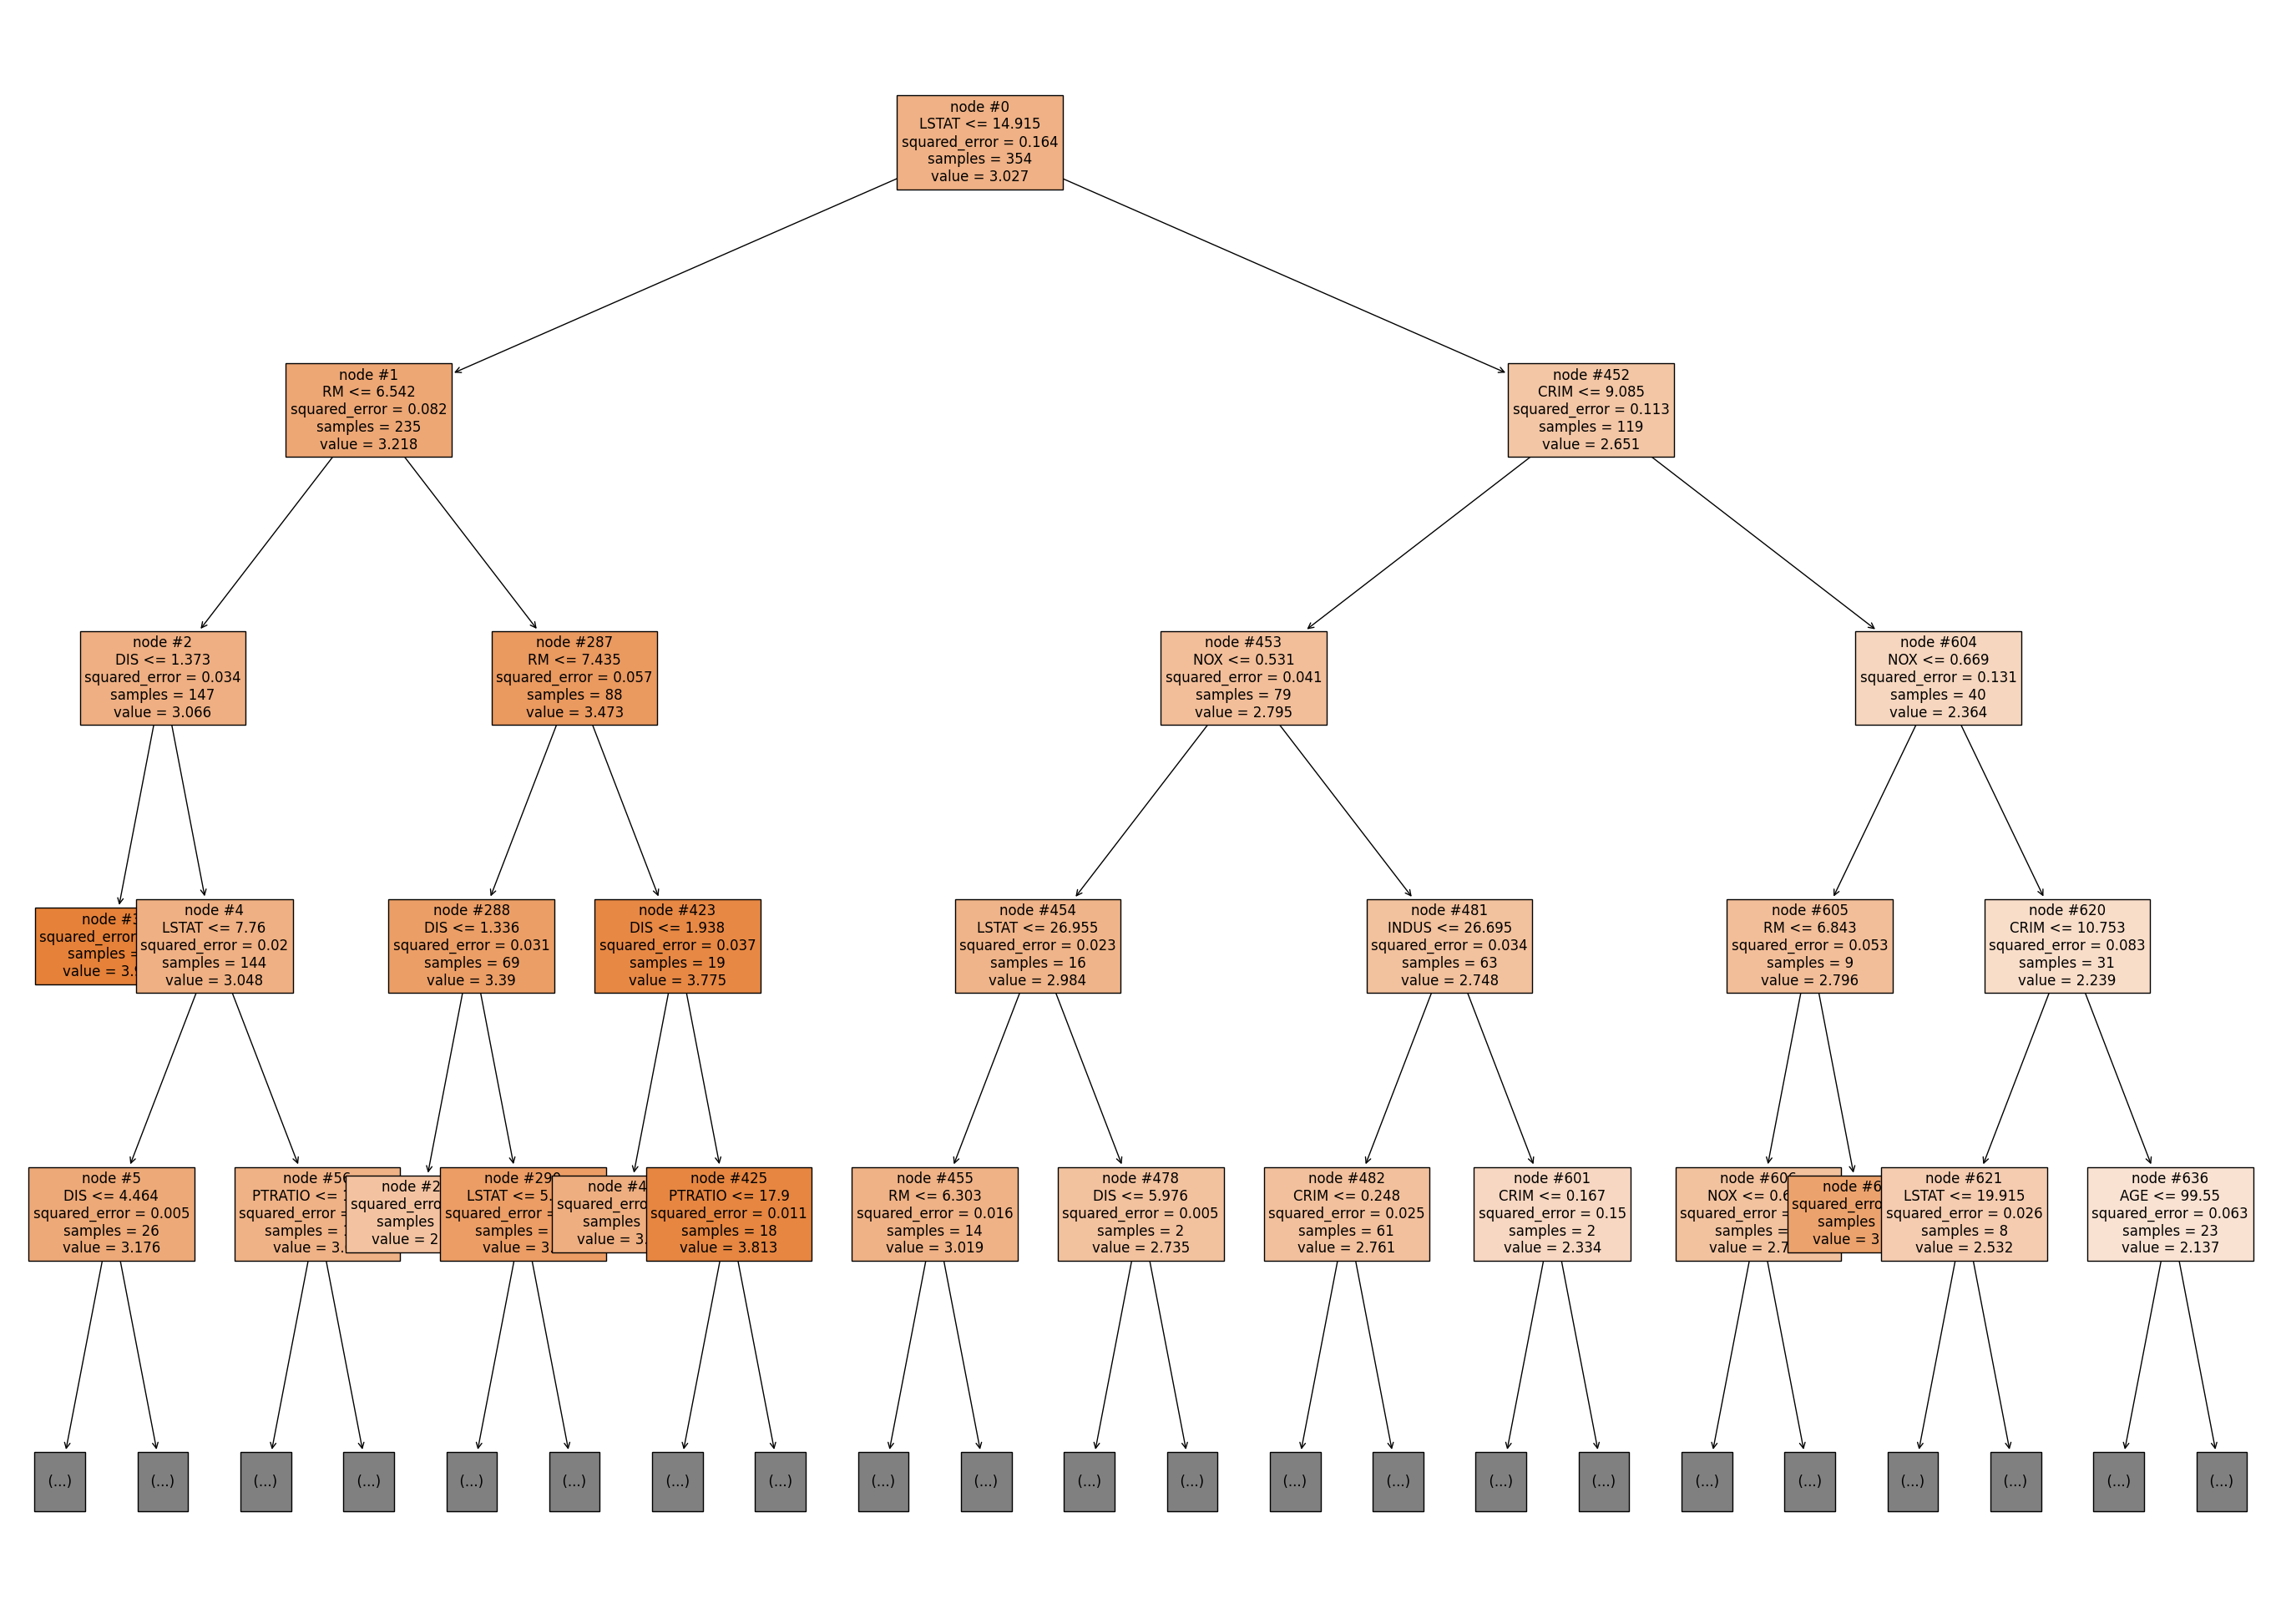

In [154]:
features = list(X1.columns)

plt.figure(figsize = (35, 25))
plot_tree(dt, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)
plt.show()

**Observations:**
- **The first split is at LSAT<=14.915%**, which signifies that in areas where LSAT% or the Lower status of the population resides is <15%, then the prices of the property are high. 
- **Other 2 important factors which decide the property rate are CRIM and RM**. Houses with no. of rooms >6 are having a high price as compared to other houses, which makes sense as more number of room corresponds to the bigger house and hence large area and thus higher prices. 
- **For the area where the per capita crime rate is higher the house prices are lower**. This corresponds to 2 things, first is maybe the area where a low population resides an even smaller crime rate is affecting that area and making it risky to live in. Second, is maybe there is a populated area and the crime rate is also high.
- **Another important parameter is the NOX level in the area**, if the area is having crime rate per capita>10% and the NOX level are greater than 0.6, then the prices of the houses are very less. This makes sense as these types of areas are neither healthy nor safe. 

**Let's plot the feature importance for each variable in the dataset and analyze the variables**

<AxesSubplot: xlabel='Importance'>

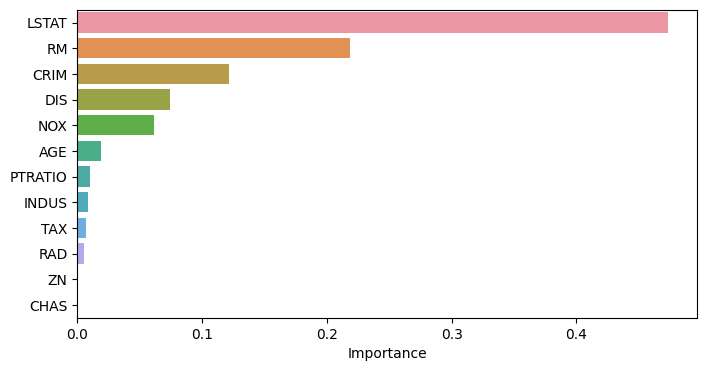

In [157]:
importances = dt.feature_importances_
columns = X1.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (8, 4))
sns.barplot(x=importance_df.Importance, y=importance_df.index)

**Observations:**
- As seen from the decision tree above, **LSAT is the more important variable** which affects the price of a house, as an area where high profile people are living tends to have a high price of the house. 
- Other important features are **RM, CRIM, DIS, and NOX level**. These variables collectively signify that people can pay a higher price for the areas where the crime rate is less, which are near highways and are healthy to live in.
- Another important observation is that areas with low LSAT, high RM, and low PTRATIO in the decision tree tend to have a high price for the houses in that area. However, we can see that these features are not as important in determining the price of the house here. One reason could be that these features are corresponding to the houses with high prices in the decision tree, implying that these features are only contributing to the area where good profile people are living.

### **Building Random Forest**

In [158]:
# Defining the Random forest regressor
rf = RandomForestRegressor(n_estimators = 200, max_depth = 4, min_samples_split = 2)

# Hyperparameters, we have randomly choosen them for now but we can tune these hyperparameters and get the best model. 

# Fitting the model
rf.fit(X_train1,y_train1)

RandomForestRegressor(max_depth=4, n_estimators=200)

Check this link to know more about different hyperparameters in RandomForest:
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

### **Checking model perform on the train and test dataset**

In [159]:
rf.score(X_test1,y_test1)

0.853424876869413

In [160]:
model_pref(rf, X_train1, X_test1, y_train1, y_test1)  

    Data      RMSE       MAE      MAPE
0  Train  0.126436  0.093772  3.298165
1   Test  0.158961  0.119206  4.219870


**Observations:**
- **MAE and MAPE for the random forest are very small and are close for both train and test dataset.** Hence model is performing very good and giving generalized results. 

**Let's plot the feature importance for each variable in the dataset and analyze the variables**

<AxesSubplot: xlabel='Importance'>

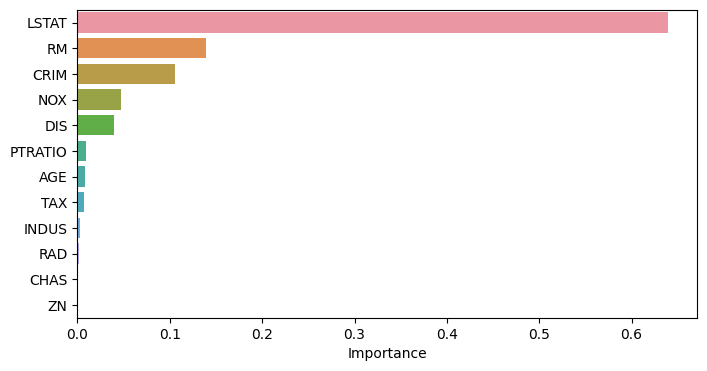

In [162]:
importances = rf.feature_importances_
columns = X1.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (8, 4))
sns.barplot(x=importance_df.Importance, y=importance_df.index)

**Observations:**
- Both Decision Tree and Random Forest have the same feature importance.

### **Comparing results for 3 models**

In [163]:
print("Linear Regression")
model_pref(model2, X_train, X_test, y_train, y_test)
print("Decision tree")
model_pref(dt, X_train1, X_test1, y_train1, y_test1)
print("Random Forest")
model_pref(rf, X_train1, X_test1, y_train1, y_test1)  

Linear Regression
    Data      RMSE       MAE      MAPE
0  Train  0.195504  0.143686  4.981813
1   Test  0.198045  0.151284  5.257965
Decision tree
    Data          RMSE           MAE          MAPE
0  Train  5.277808e-17  6.272446e-18  1.603377e-16
1   Test  2.420733e-01  1.546446e-01  5.393458e+00
Random Forest
    Data      RMSE       MAE      MAPE
0  Train  0.126436  0.093772  3.298165
1   Test  0.158961  0.119206  4.219870


**Observations:**
- All the 3 models are performing well and have low RMSE, MAE, and MAPE. 
- **Decision tree is overfitting a bit as it is giving 100% results on the train dataset**, while Linear Regression and Random Forest are not overfitting. 
- **Random forest is giving the best result of all the 3 models.** 

## **Conclusion**

- Our final **Random forest has a Mean Absolute Percentage Error (MAPE) of ~4%** on the test data, which means that **we can predict within ~4% of the price value on average**. This is a good model and we can use this model in production. 
- We can maybe use Linear regression to get statistical insights about the model and maybe use Random forest in production. 
* **Percentage lower-status population has a negative correlation with house price and has the highest importance in deciding the price for the house** because the definition of the term includes people without or with a partial high-school education and male workers classified as laborers; a population segment that is likely to live in less well-off, inexpensive areas due to their lower incomes. Hence houses in such areas would be cheaper to buy as well.

* **Crime rate is negatively correlated with house price and is also an important feature in predicting the house prices**, as neighborhoods and areas with a higher crime rate would be more undesirable and cheaper to buy a house. 

* **The NOX level is highly negatively correlated with house prices and is one of the important features in predicting house prices.** This is fairly easy to understand as more polluted areas are not desirable to live in and hence cost less.

* **The pupil-to-teacher ratio is negatively correlated with house price and the Decision tree suggested that the lower pupil-to-teacher ratio has higher house prices**, presumably because students, looking for affordable housing due to their general lack of income and having to pay tuition fees, may be concentrated in less expensive areas.

* **Distance to employment centers also has a negative correlation with house prices,** probably because, like many developed cities in the world, Boston has been built from the center radially outwards. The employment centers, being close to the center of the city as many of the oldest and most important of the city's buildings, are areas of prime real estate due to the convenience of being so close, whereas suburban areas further away from the town center that are recently developed, may be less expensive to buy houses.